In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data/train.csv")

In [3]:
df.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


In [4]:
df.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,249825.145857,0.506873,0.497898,0.521557,0.515683,0.502022,0.526515,0.487890,0.525163,0.459857,0.520532,0.483926,0.506877,0.553442,0.503713,7.905661
std,144476.732562,0.203976,0.228159,0.200770,0.233035,0.220701,0.217909,0.181096,0.216221,0.196685,0.201854,0.220082,0.218947,0.229730,0.208238,0.733071
min,1.000000,-0.082263,-0.031397,0.020967,0.152761,0.276377,0.066166,-0.097666,0.217260,-0.240604,-0.085046,0.083277,0.088635,0.029950,0.166367,0.000000
25%,124656.500000,0.343078,0.319170,0.344096,0.294935,0.284108,0.356163,0.346600,0.341486,0.330832,0.375465,0.300474,0.310166,0.350472,0.308673,7.329367
50%,249738.500000,0.484005,0.553209,0.551471,0.482880,0.451733,0.470988,0.466825,0.483460,0.416843,0.458877,0.441916,0.486599,0.487707,0.431845,7.940571
75%,374836.250000,0.643789,0.731263,0.648315,0.748705,0.670660,0.694043,0.581292,0.685250,0.575041,0.700292,0.679128,0.694453,0.768479,0.712653,8.470084
max,499999.000000,1.016227,0.859697,1.006955,1.010402,1.034261,1.043858,1.066167,1.024427,1.004114,1.199951,1.022620,1.049025,0.977845,0.868506,10.267569


In [5]:
#Ok. The numbers all just look kinda random on first glance, let's just do some basic modeling and see what happens.
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['id', 'target'], axis=1), df[['target']], test_size=0.33, random_state=42)

In [28]:
X_train.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
50834,0.296031,0.356676,0.529050,0.182615,0.283511,0.340701,0.499114,0.336525,0.000279,0.233350,0.176852,0.249959,0.202761,0.755508
279350,0.497840,0.178034,0.288692,0.319379,0.282127,0.554011,0.818508,0.354219,0.444827,0.571243,0.640547,0.699042,0.349678,0.250395
199412,0.869373,0.486085,0.208489,0.560100,0.825603,0.224159,0.456352,0.731486,0.880581,0.202807,0.183499,0.144866,0.582011,0.845179
85326,0.352026,0.089380,0.571785,0.242729,0.720037,0.214884,0.374340,0.488955,0.183023,0.354889,0.273146,0.290090,0.296391,0.439103
231192,0.944928,0.800959,0.235692,0.624583,0.472725,1.016394,0.764069,0.828905,0.882080,0.788192,0.854549,0.796039,0.911221,0.319594


In [29]:
y_test.head()

,target
4941,8.950763
51775,7.395528
115253,7.856768
299321,7.995399
173570,8.303734


In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.naive_bayes import GaussianNB

In [10]:
# Let's just loop through all the models, and get a graph of what we see.
def plot_results(name, y, yhat, num_to_plot=10000, lims=(0,12), figsize=(6,6)):
    plt.figure(figsize=figsize)
    score = mean_squared_error(y, yhat, squared=False)
    plt.scatter(y[:num_to_plot], yhat[:num_to_plot])
    plt.plot(lims, lims)
    plt.ylim(lims)
    plt.xlim(lims)
    plt.title(f'{name}: {score:0.5f}', fontsize=18)
    plt.show()

/Users/ronaldleung/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


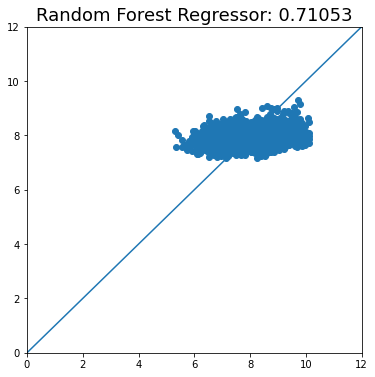

In [51]:
model_names = ["Random Forest Regressor", "Linear Regression",  "SGD Regressor", "RidgeCV", "Decision Tree Regressor"]

models = [
    RandomForestRegressor(n_estimators=50, n_jobs=-1), # 0.71114
    LinearRegression(), #0.7245,
    SGDRegressor(max_iter=1000, tol=1e-3), #0.72458
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]), #0.72456
    DecisionTreeRegressor() #1.00622
#     KNeighborsRegressor(), #0.77132 (This took forever)
#     SVR(), #0.71582 (This also took forever )
    ]

# Skipping the for loop as output for now as it's taking up space. RandomForestRegressor seems to be best. Let's use that as baseline and then we can tweak
# for name, model in zip(model_names, models):
name = "Random Forest Regressor"
model = RandomForestRegressor(n_estimators=50, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plot_results(name, y_test, y_pred)

/Users/ronaldleung/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


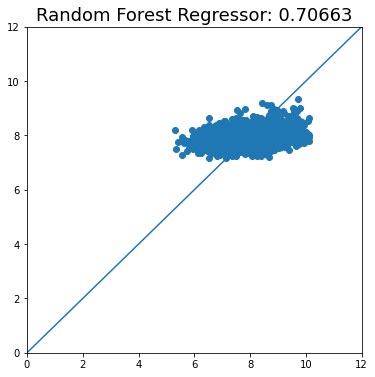

In [52]:
# Ok let's maybe try to tweak the Random Forest Regressor attributes
model = RandomForestRegressor(n_estimators=100, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plot_results(name, y_test, y_pred)

/Users/ronaldleung/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


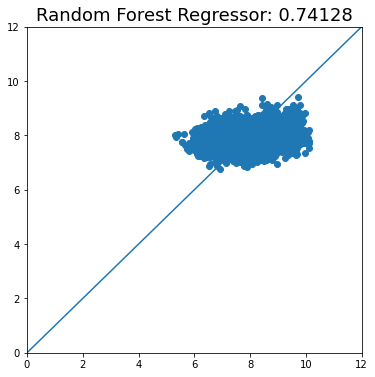

In [53]:
model = RandomForestRegressor(n_estimators=10, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plot_results(name, y_test, y_pred)

/Users/ronaldleung/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


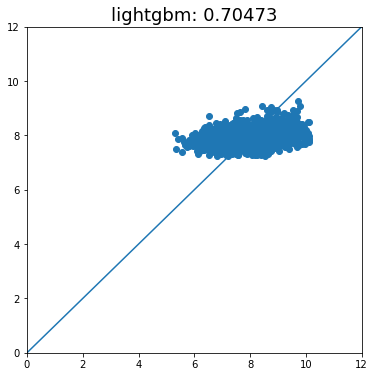

In [31]:
#More estimators seems to be better, makes sense. Let's try a bit more
model = RandomForestRegressor(n_estimators=300, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plot_results(name, y_test, y_pred)

In [82]:
#Let's try to pick just some a single column, features and see which one does best we can do any better.
for i in range(1,len(X_train.columns)):
    model = RandomForestRegressor(n_estimators=300, n_jobs=-1)
    model.fit(X_train[[X_train.columns[i]]], y_train)
    y_pred = model.predict(X_test[[X_train.columns[i]]])
    score = mean_squared_error(y_test, y_pred, squared=False)
    print("Using only column ", X_train.columns[i], ", score is: ", score)
#     plot_results(name, y_test, y_pred)

/Users/ronaldleung/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Using only column  cont2 , score is:  0.8718160719404785


/Users/ronaldleung/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Using only column  cont3 , score is:  0.8769459808516539


/Users/ronaldleung/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Using only column  cont4 , score is:  0.8825406498790651


/Users/ronaldleung/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Using only column  cont5 , score is:  0.8663133247327164


/Users/ronaldleung/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Using only column  cont6 , score is:  0.880474525561763


/Users/ronaldleung/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Using only column  cont7 , score is:  0.8810493684074062


/Users/ronaldleung/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Using only column  cont8 , score is:  0.8862504439258273


/Users/ronaldleung/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Using only column  cont9 , score is:  0.8827059239802438


/Users/ronaldleung/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Using only column  cont10 , score is:  0.8819390983486651


/Users/ronaldleung/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Using only column  cont11 , score is:  0.8811341049065154


/Users/ronaldleung/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Using only column  cont12 , score is:  0.8814857252190942


/Users/ronaldleung/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Using only column  cont13 , score is:  0.883329558822443


/Users/ronaldleung/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Using only column  cont14 , score is:  0.879448420095044


In [94]:
# It's all hovering around low 70s. Let's just try to see if we get better luck with different splits:
for i in range(0,10):
    randState = np.random.randint(1,100)
    X_train, X_test, y_train, y_test = train_test_split(df.drop(['id', 'target'], axis=1), df[['target']], test_size=0.33, random_state=randState)
    model = RandomForestRegressor(n_estimators=100, n_jobs=-1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = mean_squared_error(y_test, y_pred, squared=False)
    print("Using random state: ", randState, ", score is: ", score)

/Users/ronaldleung/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Using random state:  26 , score is:  0.708922539242382


/Users/ronaldleung/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Using random state:  80 , score is:  0.7084723973931798


/Users/ronaldleung/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Using random state:  97 , score is:  0.709455676216588


/Users/ronaldleung/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Using random state:  7 , score is:  0.7090379642197755


/Users/ronaldleung/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Using random state:  43 , score is:  0.7064264515263985


/Users/ronaldleung/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Using random state:  50 , score is:  0.7077313019488489


/Users/ronaldleung/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Using random state:  85 , score is:  0.7088589836737198


/Users/ronaldleung/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Using random state:  55 , score is:  0.7088427370064136


/Users/ronaldleung/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Using random state:  34 , score is:  0.7077730731468681


/Users/ronaldleung/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Using random state:  10 , score is:  0.7078549174296991


In [32]:
# import lightgbm as lgb
from lightgbm import LGBMRegressor

In [35]:

d_train = lgb.Dataset(X_train, label=y_train)

name = "lightgbm"
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 100
params['num_iterations'] = 5000
model = LGBMRegressor(**params)
model.fit(X_train, y_train)

/Users/ronaldleung/Anaconda/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set with min_data=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.003, max_depth=100,
              min_child_samples=20, min_child_weight=0.001, min_data=50,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1,
              num_iterations=5000, num_leaves=10, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              sub_feature=0.5, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

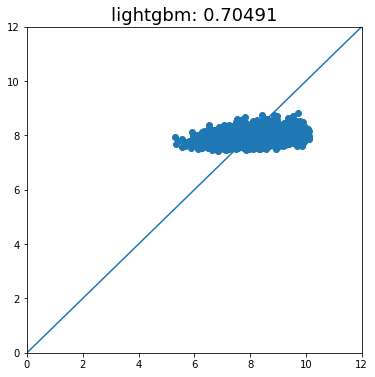

In [36]:
y_pred = model.predict(X_test)
plot_results(name, y_test, y_pred)

In [17]:
y_pred

array([0.99999631, 0.99999631, 0.99999631, ..., 0.99999631, 0.99999631,
       0.99999631])

/Users/ronaldleung/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


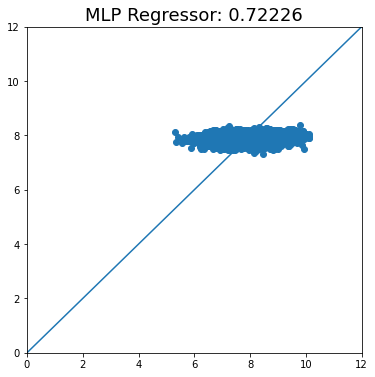

In [71]:
name = "MLP Regressor"
model = MLPRegressor(hidden_layer_sizes=30, random_state=42, max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plot_results(name, y_test, y_pred)

# Ready for predicting and submitting data

In [55]:
#Try light BGM
name = "lightgbm"
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 100
params['num_iterations'] = 200000
model = LGBMRegressor(**params)
model.fit(df.drop(['id', 'target'], axis=1), df[['target']])

[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set with min_data=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.003, max_depth=100,
              min_child_samples=20, min_child_weight=0.001, min_data=50,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1,
              num_iterations=200000, num_leaves=10, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              sub_feature=0.5, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [89]:
#Retrain model with all the data
model = RandomForestRegressor(n_estimators=300, n_jobs=-1)
model.fit(df.drop(['id', 'target'], axis=1), df[['target']])

/Users/ronaldleung/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [56]:
#OK. similar to 100. Maybe just do a quick submission for now.
cont_testdf = pd.read_csv("data/test.csv")

In [57]:
cont_pred = model.predict(cont_testdf.drop(['id'], axis=1))

In [58]:
submission_df = pd.DataFrame(cont_testdf["id"], columns=["id"])
submission_df['target'] = cont_pred
# submission_df.to_csv('random_forest_regressor_v2.csv',index=False)
submission_df.to_csv('lightgbm_v7.csv',index=False)

Submission notes:
1. First try, just random forest, model = RandomForestRegressor(n_estimators=300, n_jobs=-1), we got 0.70872, now ranked around 235 out of ~400.
2. Second try, this time same model but re-trained with the full set of training data without split.
3. Third try, trying the lightgbm with 5000 iterations
4. Fourth try, trying the lightgbm with 20000 iterations. This brought the score down to 0.7023.
5. Fifth try, even higher iterations, 40000. This got even better. still, to 0.70077, ranked 150 ish.
6. Sixth try, keep pushing, 100000 iterations of lightgbm. Even better, broke under 0.7 at 0.69973..!?
7. Seventh try, why not keep pushing, 200000. Ok this time it actually got worse, back to 0.70019.
